In [37]:
from scipy import stats
%matplotlib inline
import datetime
import calendar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns; sns.set(color_codes=True)


features:

|      feature      | Description | 
|------------|-----|
| ages | age group the lego set is meant for |
| list_price | Price of the lego set (target feature) |
| num_reviews | Number of reviews on the lego site  |
| piece_count | Number of pieces in the lego set |
| play_star_rating | Rating of the set on play star |
| prod_id | id of the lego setv|
| review_difficulty | the difficulty |
| val_star_rating | value for money rating |
| country | Country where the set is sold |



In [53]:
dataset = pd.read_csv('lego.csv')
dataset.head(1000)

,ages,list_price,num_reviews,piece_count,play_star_rating,prod_id,review_difficulty,theme_name,val_star_rating,country
0,6-12,29.9900,2.0,277.0,4.0,75823.0,Average,Angry Birds™,4.0,US
1,6-12,19.9900,2.0,168.0,4.0,75822.0,Easy,Angry Birds™,4.0,US
2,6-12,12.9900,11.0,74.0,4.3,75821.0,Easy,Angry Birds™,4.1,US
3,12+,99.9900,23.0,1032.0,3.6,21030.0,Average,Architecture,4.3,US
4,12+,79.9900,14.0,744.0,3.2,21035.0,Challenging,Architecture,4.1,US
...,...,...,...,...,...,...,...,...,...,...
995,4-7,22.7924,2.0,116.0,5.0,10743.0,Easy,Juniors,5.0,AU
996,5-12,22.7924,NaN,125.0,NaN,41155.0,NaN,Disney™,NaN,AU
997,4-7,22.7924,2.0,95.0,2.5,10742.0,Easy,Juniors,3.0,AU
998,4-7,22.7924,3.0,94.0,4.7,10736.0,Average,Juniors,4.7,AU


In [54]:
dataset.describe()

,list_price,num_reviews,piece_count,play_star_rating,prod_id,val_star_rating
count,12261.000000,10641.000000,12261.000000,10486.000000,1.226100e+04,10466.000000
mean,65.141998,16.826238,493.405921,4.337641,5.983675e+04,4.228960
std,91.980429,36.368984,825.364580,0.652051,1.638115e+05,0.660282
min,2.272400,1.000000,1.000000,1.000000,6.300000e+02,1.000000
25%,19.990000,2.000000,97.000000,4.000000,2.103400e+04,4.000000
50%,36.587800,6.000000,216.000000,4.500000,4.206900e+04,4.300000
75%,70.192200,13.000000,544.000000,4.800000,7.092200e+04,4.700000
max,1104.870000,367.000000,7541.000000,5.000000,2.000431e+06,5.000000


In [55]:
#We can drop the product id since it tells us nothing
dataset.drop('prod_id', axis=1, inplace=True)

In [56]:
#Removing outliers
dataset = dataset[(np.abs(stats.zscore(dataset['list_price'])) < 3)]
dataset.describe()

,list_price,num_reviews,piece_count,play_star_rating,val_star_rating
count,11985.000000,10365.000000,11985.000000,10210.000000,10190.000000
mean,54.811859,15.282489,413.070755,4.334251,4.227978
std,55.409550,34.006721,588.439560,0.657175,0.660873
min,2.272400,1.000000,1.000000,1.000000,1.000000
25%,19.990000,2.000000,95.000000,4.000000,4.000000
50%,36.587800,6.000000,208.000000,4.500000,4.300000
75%,67.087800,13.000000,494.000000,4.800000,4.700000
max,337.870000,367.000000,5923.000000,5.000000,5.000000


In [57]:
# In describe above we still see different count values for num_reviews, play_star_rating and val_star_rating, this could indicate nan values, so check if any nan values
dataset[dataset.isnull().any(axis=1)]

,ages,list_price,num_reviews,piece_count,play_star_rating,review_difficulty,theme_name,val_star_rating,country
22,10+,9.9900,1.0,136.0,NaN,NaN,BrickHeadz,NaN,US
32,10+,19.9900,NaN,209.0,NaN,NaN,BrickHeadz,NaN,US
48,5-12,49.9900,NaN,387.0,NaN,NaN,City,NaN,US
55,7-12,99.9900,1.0,883.0,5.0,NaN,City,5.0,US
69,5-12,39.9900,NaN,297.0,NaN,NaN,City,NaN,US
...,...,...,...,...,...,...,...,...,...
12136,8-14,36.5878,NaN,104.0,NaN,NaN,Star Wars™,NaN,PT
12137,8-14,36.5878,NaN,101.0,NaN,NaN,Star Wars™,NaN,PT
12196,14+,243.9878,NaN,1967.0,NaN,NaN,Star Wars™,NaN,PT
12214,7-14,24.3878,1.0,135.0,5.0,NaN,Technic,5.0,PT


In [58]:
#We see there indeed are nan values, we could change it for the mean value, but here will drop the rows with nan values since we have enough data left and to many nan values.
dataset.dropna(inplace=True)

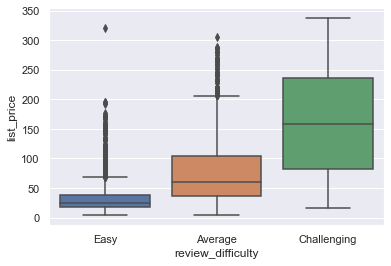

In [59]:
#Boxplot price - difficulty
ax = sns.boxplot(x="review_difficulty", y="list_price", data=dataset,order=["Easy","Average","Challenging"])
#How higher the difficulty how higher the price

In [60]:
#One-hot encoding ages
dataset = pd.concat([dataset,pd.get_dummies(dataset['ages'], prefix='age')],axis=1)
dataset.drop(['ages'],axis=1, inplace=True)

#One-hot encoding difficulty
dataset = pd.concat([dataset,pd.get_dummies(dataset['review_difficulty'], prefix='difficulty')],axis=1)
dataset.drop(['review_difficulty'],axis=1, inplace=True)

#One-hot encoding theme
dataset = pd.concat([dataset,pd.get_dummies(dataset['theme_name'], prefix='theme')],axis=1)
dataset.drop(['theme_name'],axis=1, inplace=True)

#One-hot encoding country
dataset = pd.concat([dataset,pd.get_dummies(dataset['country'], prefix='country')],axis=1)
dataset.drop(['country'],axis=1, inplace=True)

dataset.head()

,list_price,num_reviews,piece_count,play_star_rating,val_star_rating,age_10+,age_10-14,age_10-16,age_10-21,age_11-16,...,country_GB,country_IE,country_IT,country_LU,country_NL,country_NO,country_NZ,country_PL,country_PT,country_US
0,29.99,2.0,277.0,4.0,4.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,19.99,2.0,168.0,4.0,4.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,12.99,11.0,74.0,4.3,4.1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,99.99,23.0,1032.0,3.6,4.3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,79.99,14.0,744.0,3.2,4.1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [61]:
#Splitting features and target
X = dataset.drop(['list_price'], axis=1)
y= dataset['list_price'].values

In [62]:
# Splitting training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [63]:
#Minmax scaler so we keep our one hot encoded values
scaler = preprocessing.MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [64]:
# Training simple basic model
lregmodel = linear_model.LinearRegression()
lregmodel.fit(X_train,y_train)


LinearRegression()

In [65]:
# Evaluating the model
y_predicted = lregmodel.predict(X_test)
#MAE
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test,y_predicted)
print('MAE = ',MAE)

#MSE
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test,y_predicted)
print('MSE = ',MSE)

#R2
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_predicted)
print('r2 score = ',r2)

#model will on average miss the target price by $11.54
#Model will predict 91% determination


MAE =  11.545103899140546
MSE =  325.83040262561235
r2 score =  0.9095683867792528


In [66]:
# Modeloptimalisation and Hyperparameter tuning (Manual for experimental purposus, could use cross validation)
grade = 2

poly = PolynomialFeatures(grade)
poly.fit(X_train)
X_train_poly = poly.transform(X_train)
X_test_poly = poly.transform(X_test)
print('dimension X_train_poly: ',X_train_poly.shape)
print('dimension X_test_poly: ',X_test_poly.shape)

# L2 regularisation with Ridge regression
lregmodel_poly_ridge = Ridge(alpha=0.001,tol=0.0001,fit_intercept=True)
lregmodel_poly_ridge.fit(X_train_poly,y_train)
print('R2 score with L2: ',lregmodel_poly_ridge.score(X_test_poly,y_test))
# R2 score with L2 on trainingset
print('R2 score on training set with L2: ',lregmodel_poly_ridge.score(X_train_poly,y_train))


# L1 regularisatie with Lasso regression
lregmodel_poly = Lasso(alpha=0.001,tol=0.00001,fit_intercept=True)
lregmodel_poly.fit(X_train_poly,y_train)      
print('R2 score with L1: ',lregmodel_poly.score(X_test_poly,y_test))
# R2 -score via L1 op de trainingset
print('R2 score on training set with L1: ',lregmodel_poly.score(X_train_poly,y_train))

# We used higher grade 2, Both ridge and lasso give similair accuracy


dimension X_train_poly:  (7908, 5050)
dimension X_test_poly:  (1978, 5050)
R2 score with L2:  0.971911759364984
R2 score on training set with L2:  0.9892674563261271
R2 score with L1:  0.9823019683777305
R2 score on training set with L1:  0.9858865444331586


/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 161438.87990802858, tolerance: 269.808091741208
  model = cd_fast.enet_coordinate_descent(


Text(0, 0.5, 'R^2 performance')

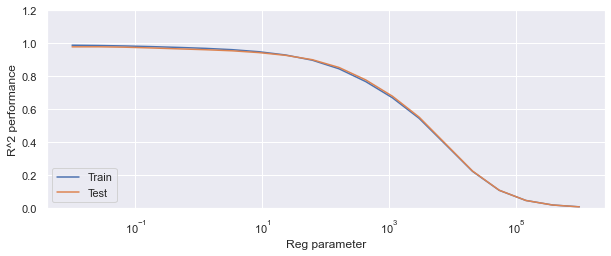

In [67]:
#Graph to find optimal alpha, 0.001-0.01 seems optimal
train_r2=[]
test_r2=[]

alphas=np.logspace(-2,6,20)
for alpha in alphas:
    lregmodel_poly=Ridge(alpha=alpha,tol=0.0001,fit_intercept=True)
    lregmodel_poly.fit(X_train_poly,y_train)
    test_r2.append(lregmodel_poly.score(X_test_poly,y_test))
    train_r2.append(lregmodel_poly.score(X_train_poly,y_train))
    
f,ax=plt.subplots(figsize=(10,8))
plt.subplot(2,1,1)
plt.semilogx(alphas,train_r2,label='Train')
plt.semilogx(alphas,test_r2,label='Test')
plt.legend(loc="lower left")
plt.ylim([0,1.2])
plt.xlabel('Reg parameter')
plt.ylabel('R^2 performance')